# Experiment 3: Regression

## Libairies

In [56]:
import torch
import numpy as np
import pylab as pl
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from src.ModelRegression import Net

## Loading the data

In [57]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

## Data Preprocessing

In [58]:
mean = X_train.mean(axis=0)
X_train -= mean
X_test -= mean
std = X_train.std(axis=0)
X_train /= std
X_test /= std

X_train = torch.from_numpy(X_train).reshape(X_train.shape[0], 1, X_train.shape[1]).to(torch.float32)
X_test = torch.from_numpy(X_test).reshape(X_test.shape[0], 1, X_test.shape[1]).to(torch.float32)
y_train = torch.from_numpy(y_train).reshape(y_train.shape[0],).to(torch.float32)
y_test = torch.from_numpy(y_test).reshape(y_test.shape[0],).to(torch.float32)

## Model & Optimization algorithms

In [59]:
batches_per_epoch = 1
batch_size= 400
mse_loss = torch.nn.MSELoss()
mae_loss = torch.nn.L1Loss()
Nepochs = 70

### Stochastic Gradient Descent

In [60]:
model_ConvNN = Net()
mse_train_sgd, mse_test_sgd, mae_train_sgd, mae_test_sgd = model_ConvNN.training_SGD(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=5e-3, verbose=True)
n = np.argmin(mae_test_sgd)
mse_sgd, mae_sgd = mse_test_sgd[n].detach().numpy(), mae_test_sgd[n].detach().numpy()

Launching SGD training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 590.6195678710938| MAE train = 22.49233627319336 | Loss test = 587.891357421875| MAE test = 22.486297607421875
Epoch 11 / 70 : Loss train = 49.24205017089844| MAE train = 5.196166515350342 | Loss test = 50.290977478027344| MAE test = 5.685123443603516
Epoch 21 / 70 : Loss train = 32.976524353027344| MAE train = 4.165492057800293 | Loss test = 34.77457046508789| MAE test = 4.375158786773682
Epoch 31 / 70 : Loss train = 35.1129150390625| MAE train = 4.348178863525391 | Loss test = 46.08314514160156| MAE test = 4.721176624298096
Epoch 41 / 70 : Loss train = 37.38945388793945| MAE train = 4.582601070404053 | Loss test = 35.503910064697266| MAE test = 4.624734878540039
Epoch 51 / 70 : Loss train = 38.963775634765625| MAE train = 4.661492347717285 | Loss test = 50.74077606201172| MAE test = 5.232336521148682
Epoch 61 / 70 : Loss train = 30.355268478393555| MAE train = 4.098773002624512 | Loss test = 37.88

### Momentum

In [61]:
model_ConvNN = Net()
mse_train_mom, mse_test_mom, mae_train_mom, mae_test_mom = model_ConvNN.training_Mom(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=1e-2, beta=0.9, verbose=True)
n = np.argmin(mae_test_mom)
mse_mom, mae_mom = mse_test_mom[n].detach().numpy(), mae_test_mom[n].detach().numpy()

Launching Momentum training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 589.21826171875| MAE train = 22.448007583618164 | Loss test = 610.3606567382812| MAE test = 22.960216522216797
Epoch 11 / 70 : Loss train = 99.22562408447266| MAE train = 7.388033390045166 | Loss test = 232.8697509765625| MAE test = 11.639487266540527
Epoch 21 / 70 : Loss train = 51.51667404174805| MAE train = 4.958113193511963 | Loss test = 48.90851974487305| MAE test = 5.298407554626465
Epoch 31 / 70 : Loss train = 40.29167938232422| MAE train = 4.888810157775879 | Loss test = 55.16852569580078| MAE test = 5.756406784057617
Epoch 41 / 70 : Loss train = 31.209856033325195| MAE train = 4.007718086242676 | Loss test = 32.522666931152344| MAE test = 4.201199054718018
Epoch 51 / 70 : Loss train = 22.731117248535156| MAE train = 3.335097312927246 | Loss test = 24.93777847290039| MAE test = 3.803070306777954
Epoch 61 / 70 : Loss train = 18.653379440307617| MAE train = 3.2240822315216064 | Loss test 

### Nesterov Accelerated Gradient 

In [62]:
model_ConvNN = Net()
mse_train_nag, mse_test_nag, mae_train_nag, mae_test_nag = model_ConvNN.training_NAG(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=1e-2, beta=0.9, verbose=True)
n = np.argmin(mae_test_nag)
mse_nag, mae_nag = mse_test_nag[n].detach().numpy(), mae_test_nag[n].detach().numpy()

Launching NAG training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 590.5638427734375| MAE train = 22.479230880737305 | Loss test = 612.8528442382812| MAE test = 23.02067756652832
Epoch 11 / 70 : Loss train = 87.17073059082031| MAE train = 7.277984142303467 | Loss test = 49.120845794677734| MAE test = 5.568088531494141
Epoch 21 / 70 : Loss train = 29.15209197998047| MAE train = 3.8066582679748535 | Loss test = 36.44062042236328| MAE test = 4.518285274505615
Epoch 31 / 70 : Loss train = 25.531902313232422| MAE train = 3.5542571544647217 | Loss test = 25.376205444335938| MAE test = 3.905881404876709
Epoch 41 / 70 : Loss train = 19.956275939941406| MAE train = 3.3311374187469482 | Loss test = 38.321495056152344| MAE test = 4.164982318878174
Epoch 51 / 70 : Loss train = 18.37896156311035| MAE train = 3.136871576309204 | Loss test = 35.53498458862305| MAE test = 4.133326053619385
Epoch 61 / 70 : Loss train = 18.47988510131836| MAE train = 3.139702081680298 | Loss test = 

### AdaGrad

In [63]:
model_ConvNN = Net()
mse_train_adg, mse_test_adg, mae_train_adg, mae_test_adg = model_ConvNN.training_ADG(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_adg)
mse_adg, mae_adg = mse_test_adg[n].detach().numpy(), mae_test_adg[n].detach().numpy()

Launching AdaGrad training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 580.32373046875| MAE train = 22.253162384033203 | Loss test = 580.572021484375| MAE test = 22.330961227416992
Epoch 11 / 70 : Loss train = 70.96896362304688| MAE train = 6.802911281585693 | Loss test = 70.40569305419922| MAE test = 6.609826564788818
Epoch 21 / 70 : Loss train = 33.02189636230469| MAE train = 4.278265476226807 | Loss test = 51.75123977661133| MAE test = 5.529706954956055
Epoch 31 / 70 : Loss train = 28.750608444213867| MAE train = 3.98105525970459 | Loss test = 44.007606506347656| MAE test = 5.079307556152344
Epoch 41 / 70 : Loss train = 28.39370346069336| MAE train = 3.7512896060943604 | Loss test = 37.16509246826172| MAE test = 4.577439785003662
Epoch 51 / 70 : Loss train = 25.243989944458008| MAE train = 3.7438693046569824 | Loss test = 41.35834503173828| MAE test = 4.810828685760498
Epoch 61 / 70 : Loss train = 25.366601943969727| MAE train = 3.8068130016326904 | Loss test = 

### RMSProp

In [64]:
model_ConvNN = Net()
mse_train_rms, mse_test_rms, mae_train_rms, mae_test_rms = model_ConvNN.training_RMS(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.005, gamma=0.999, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_rms)
mse_rms, mae_rms = mse_test_rms[n].detach().numpy(), mae_test_rms[n].detach().numpy()

Launching RMS Prop training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 581.165771484375| MAE train = 22.285310745239258 | Loss test = 587.8546142578125| MAE test = 22.4461669921875
Epoch 11 / 70 : Loss train = 50.1700325012207| MAE train = 5.396366119384766 | Loss test = 47.00444412231445| MAE test = 5.658303737640381
Epoch 21 / 70 : Loss train = 39.54979705810547| MAE train = 4.539051532745361 | Loss test = 51.844390869140625| MAE test = 5.55752420425415
Epoch 31 / 70 : Loss train = 28.205516815185547| MAE train = 3.9397921562194824 | Loss test = 37.77608871459961| MAE test = 4.6260786056518555
Epoch 41 / 70 : Loss train = 26.491872787475586| MAE train = 3.8506381511688232 | Loss test = 36.61919021606445| MAE test = 4.692188739776611
Epoch 51 / 70 : Loss train = 27.443849563598633| MAE train = 3.8990373611450195 | Loss test = 36.65022659301758| MAE test = 4.649108409881592
Epoch 61 / 70 : Loss train = 25.22030258178711| MAE train = 3.7553188800811768 | Loss test 

### Adam

In [65]:
model_ConvNN = Net()
mse_train_adam, mse_test_adam, mae_train_adam, mae_test_adam = model_ConvNN.training_ADAM(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_adam)
mse_adam, mae_adam = mse_test_adam[n].detach().numpy(), mae_test_adam[n].detach().numpy()

Launching Adam training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 587.9463500976562| MAE train = 22.433935165405273 | Loss test = 578.3945922851562| MAE test = 22.275609970092773
Epoch 11 / 70 : Loss train = 110.4101333618164| MAE train = 7.7064690589904785 | Loss test = 76.06034088134766| MAE test = 6.944036960601807
Epoch 21 / 70 : Loss train = 53.50831604003906| MAE train = 5.398509502410889 | Loss test = 47.38933181762695| MAE test = 5.229382038116455
Epoch 31 / 70 : Loss train = 37.405364990234375| MAE train = 4.4485673904418945 | Loss test = 42.50868225097656| MAE test = 5.186593532562256
Epoch 41 / 70 : Loss train = 29.369041442871094| MAE train = 4.065985202789307 | Loss test = 38.77534103393555| MAE test = 4.652217388153076
Epoch 51 / 70 : Loss train = 23.662382125854492| MAE train = 3.6317567825317383 | Loss test = 28.88644027709961| MAE test = 4.090367794036865
Epoch 61 / 70 : Loss train = 22.767742156982422| MAE train = 3.530656099319458 | Loss test =

### AMS Grad

In [66]:
model_ConvNN = Net()
mse_train_ams, mse_test_ams, mae_train_ams, mae_test_ams = model_ConvNN.training_AMS(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.005, beta1=0.9, beta2=0.999, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_ams)
mse_ams, mae_ams = mse_test_ams[n].detach().numpy(), mae_test_ams[n].detach().numpy()

Launching AMS Grad training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 576.7901000976562| MAE train = 22.186443328857422 | Loss test = 583.221923828125| MAE test = 22.337146759033203
Epoch 11 / 70 : Loss train = 48.735843658447266| MAE train = 5.075395584106445 | Loss test = 82.76103210449219| MAE test = 7.534053802490234
Epoch 21 / 70 : Loss train = 34.65804672241211| MAE train = 4.276381969451904 | Loss test = 37.86738204956055| MAE test = 4.81712532043457
Epoch 31 / 70 : Loss train = 30.21527671813965| MAE train = 4.164524078369141 | Loss test = 54.03489685058594| MAE test = 5.075539588928223
Epoch 41 / 70 : Loss train = 27.215225219726562| MAE train = 3.940589666366577 | Loss test = 46.133026123046875| MAE test = 5.158008575439453
Epoch 51 / 70 : Loss train = 23.959863662719727| MAE train = 3.543424606323242 | Loss test = 45.873477935791016| MAE test = 4.919158935546875
Epoch 61 / 70 : Loss train = 26.865196228027344| MAE train = 3.8771636486053467 | Loss test

### Nadam

In [67]:
model_ConvNN = Net()
mse_train_nadam, mse_test_nadam, mae_train_nadam, mae_test_nadam = model_ConvNN.training_NADAM(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, mu=0.9, nu=0.999, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_nadam)
mse_nadam, mae_nadam = mse_test_nadam[n].detach().numpy(), mae_test_nadam[n].detach().numpy()

Launching Nadam training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 590.54248046875| MAE train = 22.474018096923828 | Loss test = 514.6611328125| MAE test = 20.87778663635254
Epoch 11 / 70 : Loss train = 34.74366760253906| MAE train = 4.399846076965332 | Loss test = 36.56107711791992| MAE test = 4.770505905151367
Epoch 21 / 70 : Loss train = 26.652284622192383| MAE train = 3.8386003971099854 | Loss test = 40.442474365234375| MAE test = 4.504891872406006
Epoch 31 / 70 : Loss train = 20.720354080200195| MAE train = 3.391345262527466 | Loss test = 31.537065505981445| MAE test = 4.181021690368652
Epoch 41 / 70 : Loss train = 22.4403133392334| MAE train = 3.592473030090332 | Loss test = 37.28466796875| MAE test = 4.113818645477295
Epoch 51 / 70 : Loss train = 20.930225372314453| MAE train = 3.438612699508667 | Loss test = 29.20063018798828| MAE test = 3.799751043319702
Epoch 61 / 70 : Loss train = 18.78323745727539| MAE train = 3.2447545528411865 | Loss test = 33.73175

### Adamax

In [68]:
model_ConvNN = Net()
mse_train_adamax, mse_test_adamax, mae_train_adamax, mae_test_adamax = model_ConvNN.training_ADAMAX(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, beta1=0.9, beta2=0.999, lambd=0, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_adamax)
mse_adamax, mae_adamax = mse_test_adamax[n].detach().numpy(), mae_test_adamax[n].detach().numpy()

Launching Adamax training of model
Number of parameters : 5121
Epoch 1 / 70 : Loss train = 580.9813842773438| MAE train = 22.331708908081055 | Loss test = 571.6250610351562| MAE test = 22.085973739624023
Epoch 11 / 70 : Loss train = 135.38333129882812| MAE train = 8.921590805053711 | Loss test = 154.93104553222656| MAE test = 9.924627304077148
Epoch 21 / 70 : Loss train = 48.0172004699707| MAE train = 5.376776695251465 | Loss test = 62.419002532958984| MAE test = 6.403153419494629
Epoch 31 / 70 : Loss train = 32.976863861083984| MAE train = 4.343414306640625 | Loss test = 51.198883056640625| MAE test = 5.391702651977539
Epoch 41 / 70 : Loss train = 26.952611923217773| MAE train = 3.8483340740203857 | Loss test = 40.35419464111328| MAE test = 4.789855480194092
Epoch 51 / 70 : Loss train = 26.173782348632812| MAE train = 3.9571402072906494 | Loss test = 41.75667190551758| MAE test = 4.736217498779297
Epoch 61 / 70 : Loss train = 26.1439151763916| MAE train = 3.7091660499572754 | Loss tes

### Nostalgic Adam

In [69]:
model_ConvNN = Net()
mse_train_nos, mse_test_nos, mae_train_nos, mae_test_nos = model_ConvNN.training_NOS(X_train, y_train, X_test, y_test, n_epochs=Nepochs, alpha=0.02, beta1=0.9, gamma=1e-5, epsilon=1e-8, verbose=True)
n = np.argmin(mae_test_nos)
mse_nos, mae_nos = mse_test_nos[n].detach().numpy(), mae_test_nos[n].detach().numpy()

Launching Nostalgic Adam training of model
Number of parameters : 5121
Epoch 11 / 70 : Loss train = 111.9544906616211| MAE train = 8.280830383300781 | Loss test = 119.36035919189453| MAE test = 8.621224403381348
Epoch 21 / 70 : Loss train = 57.5570182800293| MAE train = 5.792041778564453 | Loss test = 68.15228271484375| MAE test = 6.558354377746582
Epoch 31 / 70 : Loss train = 32.237640380859375| MAE train = 4.241474628448486 | Loss test = 43.72309494018555| MAE test = 5.339714050292969
Epoch 41 / 70 : Loss train = 32.168704986572266| MAE train = 4.172528266906738 | Loss test = 33.99302673339844| MAE test = 4.497640132904053
Epoch 51 / 70 : Loss train = 24.38921546936035| MAE train = 3.7734341621398926 | Loss test = 32.64910888671875| MAE test = 4.369063854217529
Epoch 61 / 70 : Loss train = 24.679189682006836| MAE train = 3.789144515991211 | Loss test = 25.096832275390625| MAE test = 3.8885157108306885
Epoch 71 / 70 : Loss train = 23.159557342529297| MAE train = 3.658682346343994 | Lo

## Plots

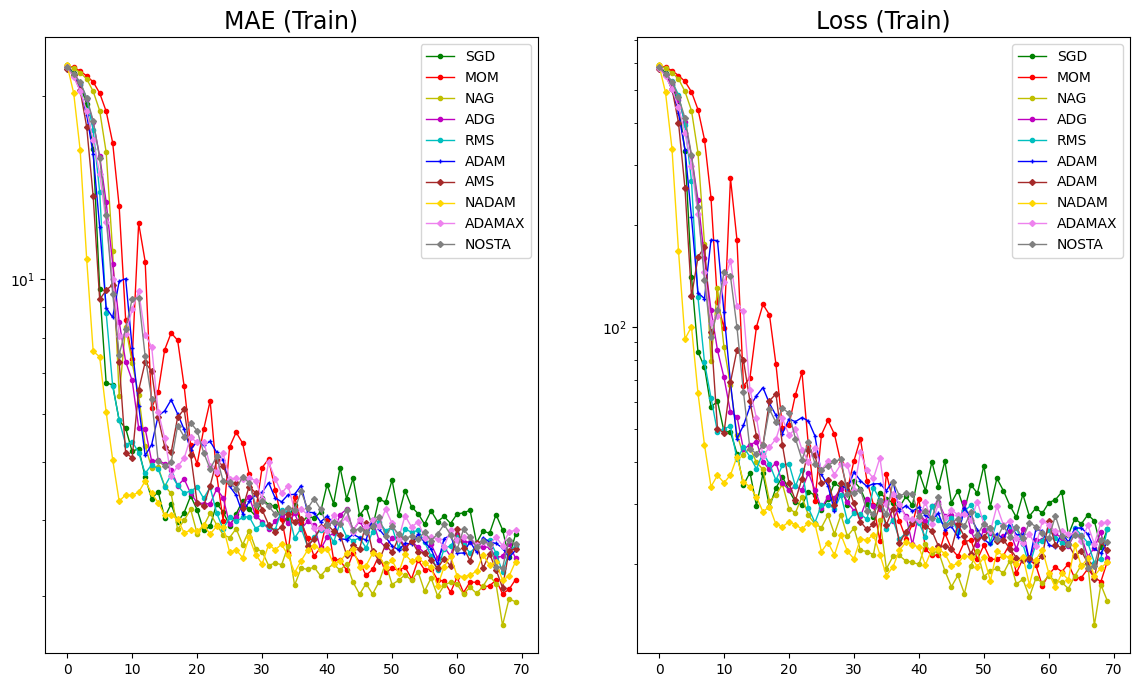

In [70]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(mae_train_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(mae_train_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(mae_train_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(mae_train_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(mae_train_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(mae_train_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(mae_train_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(mae_train_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(mae_train_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(mae_train_nos, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("MAE (Train)", size=17)
ax[0].legend()
ax[0].set_yscale('log')

ax[1].plot(mse_train_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(mse_train_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(mse_train_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(mse_train_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(mse_train_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(mse_train_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(mse_train_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(mse_train_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(mse_train_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].plot(mse_train_nos, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[1].set_title("Loss (Train)", size=17)
ax[1].legend()
ax[1].set_yscale('log')

In [71]:
list_algo = ['SGD', 'MOM', 'NAG', 'ADG', 'RMS', 'ADAM', 'AMS', 'NADAM', 'ADAMAX', 'NOSTA']
list_test_mse = [mse_sgd, mse_mom, mse_nag, mse_adg, mse_rms, mse_adam, mse_ams, mse_nadam, mse_adamax, mse_nos]
list_test_mae = [mae_sgd, mae_mom, mae_nag, mae_adg, mae_rms, mae_adam, mae_ams, mae_nadam, mae_adamax, mae_nos]
dico = {'Name':list_algo, 'Loss':list_test_mse, 'MAE':list_test_mae}
df = pd.DataFrame(dico)
df

,Name,Loss,MAE
0,SGD,32.289402,3.9726312
1,MOM,26.128288,3.643694
2,NAG,31.632784,3.4460154
3,ADG,28.679266,3.870798
4,RMS,25.428267,3.9103708
5,ADAM,25.027214,3.6892462
6,AMS,23.916958,3.6705124
7,NADAM,29.326841,3.4384363
8,ADAMAX,33.78123,3.9228911
9,NOSTA,25.096832,3.8885157
